In [1]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
# MNIST veri setinin Keras kütüphanesi üzerinden yüklenmesi

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [7]:
# Veri Ön İşleme - Adım 1 - Görüntülerin yeniden boyutlandırılması

x_train = x_train.reshape(-1, 28, 28, 1) # -1: Görüntülerin toplam sayısı
x_test = x_test.reshape(-1, 28, 28, 1)

#Veri Ön İşleme - Adım 2 - Görüntülerin normalize edilmesi# -1: Görüntülerin toplam sayısı
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(f"Eğitim (Train) Verilerinin Sayısı ve boyutu = {x_train.shape}")
print(f"Test verilerinin sayısı ve Boyutu = {x_test.shape}")

Eğitim (Train) Verilerinin Sayısı ve boyutu = (60000, 28, 28, 1)
Test verilerinin sayısı ve Boyutu = (10000, 28, 28, 1)


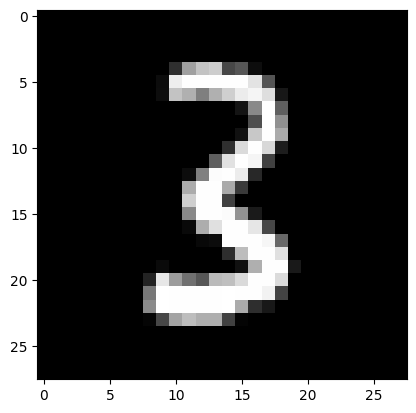

In [15]:
# Çıkış verisi olarak bu gıral görüntülerini hangi rakamı temsil ettiğini gösteren y verilerini düzeliyoruz

plt.imshow(x_train[50000],cmap="gray")

In [9]:
y_train[50000]

3

In [11]:
#One-hot Encoding
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [13]:
y_train[50000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
 #Eğitim verilerinin %20'sinin doğrulama (validation) verisi olarak ayrılması Literatürde Data-split işlemi denilir.
# bu işlem genellikle sklear altındaki train_test_split fonksiyonu ile yapılır

X_train, X_val, y_train_split, y_val = train_test_split(
    x_train, y_train,
    test_size = 0.2, #validasyon verisi yüzde kaç olacak bilgisi burada
    random_state = 42, # rastgelelik işlemini biraz sınırlı tutuyoruz
    stratify = y_train # rastgele şekilde dağılım yaparken sınıf dengesini korur
    )

In [37]:
#CNN tabanlı yapayzeka modelimizi oluşturuyoruz
model = keras.Sequential([
    #CNN ilk blok
    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape =(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    #CNN ikinci blok
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    #YAPAY SİNİR AĞI TANIMLIYORUZ
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')
])

In [47]:
#Modeli derliyoruz

model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [55]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    'mnist_classifiction_cnn_model_h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [59]:
#Modelimizi eğitiyoruz(.fit fonksiyonu ile)

history = model.fit(X_train, y_train_split, validation_data=(X_val, y_val),
                  batch_size=128, epochs=10,  callbacks=model_checkpoint)

Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 0.1967 - accuracy: 0.9417
Epoch 1: val_accuracy improved from -inf to 0.71467, saving model to mnist_classifiction_cnn_model_h5


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


375/375 [==============================] - 34s 90ms/step - loss: 0.1967 - accuracy: 0.9417 - val_loss: 0.8517 - val_accuracy: 0.7147
Epoch 2/10
375/375 [==============================] - ETA: 0s - loss: 0.0641 - accuracy: 0.9802
Epoch 2: val_accuracy improved from 0.71467 to 0.98817, saving model to mnist_classifiction_cnn_model_h5


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


375/375 [==============================] - 34s 90ms/step - loss: 0.0641 - accuracy: 0.9802 - val_loss: 0.0393 - val_accuracy: 0.9882
Epoch 3/10
375/375 [==============================] - ETA: 0s - loss: 0.0472 - accuracy: 0.9855
Epoch 3: val_accuracy improved from 0.98817 to 0.99083, saving model to mnist_classifiction_cnn_model_h5


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


375/375 [==============================] - 34s 90ms/step - loss: 0.0472 - accuracy: 0.9855 - val_loss: 0.0310 - val_accuracy: 0.9908
Epoch 4/10
375/375 [==============================] - ETA: 0s - loss: 0.0391 - accuracy: 0.9874
Epoch 4: val_accuracy did not improve from 0.99083
375/375 [==============================] - 32s 86ms/step - loss: 0.0391 - accuracy: 0.9874 - val_loss: 0.0312 - val_accuracy: 0.9908
Epoch 5/10
375/375 [==============================] - ETA: 0s - loss: 0.0370 - accuracy: 0.9881
Epoch 5: val_accuracy improved from 0.99083 to 0.99150, saving model to mnist_classifiction_cnn_model_h5


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


375/375 [==============================] - 34s 89ms/step - loss: 0.0370 - accuracy: 0.9881 - val_loss: 0.0282 - val_accuracy: 0.9915
Epoch 6/10
375/375 [==============================] - ETA: 0s - loss: 0.0306 - accuracy: 0.9905
Epoch 6: val_accuracy improved from 0.99150 to 0.99208, saving model to mnist_classifiction_cnn_model_h5


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


375/375 [==============================] - 34s 90ms/step - loss: 0.0306 - accuracy: 0.9905 - val_loss: 0.0255 - val_accuracy: 0.9921
Epoch 7/10
375/375 [==============================] - ETA: 0s - loss: 0.0284 - accuracy: 0.9909
Epoch 7: val_accuracy did not improve from 0.99208
375/375 [==============================] - 33s 87ms/step - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.0300 - val_accuracy: 0.9914
Epoch 8/10
375/375 [==============================] - ETA: 0s - loss: 0.0264 - accuracy: 0.9919
Epoch 8: val_accuracy did not improve from 0.99208
375/375 [==============================] - 33s 87ms/step - loss: 0.0264 - accuracy: 0.9919 - val_loss: 0.0396 - val_accuracy: 0.9872
Epoch 9/10
375/375 [==============================] - ETA: 0s - loss: 0.0232 - accuracy: 0.9926
Epoch 9: val_accuracy did not improve from 0.99208
375/375 [==============================] - 32s 86ms/step - loss: 0.0232 - accuracy: 0.9926 - val_loss: 0.0255 - val_accuracy: 0.9918
Epoch 10/10
375/375 [======

INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


375/375 [==============================] - 34s 90ms/step - loss: 0.0205 - accuracy: 0.9931 - val_loss: 0.0237 - val_accuracy: 0.9930


In [61]:
print("Test işlemi için değerşnedirme yapılıyor")

test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Modelin Loss performansı = {test_loss}")
print(f"Modelin Accuracy (Doğruluk Başarısı) Performansı = {test_accuracy}")

Test işlemi için değerşnedirme yapılıyor
313/313 [==============================] - 3s 8ms/step - loss: 0.0183 - accuracy: 0.9938
Modelin Loss performansı = 0.018285736441612244
Modelin Accuracy (Doğruluk Başarısı) Performansı = 0.9937999844551086
